# Products mix optimizations 

## Introduction.

Product mixtures of product type are the first addressed in optimization.

They make it possible to optimize the production and commercial efficiency of a factory or an agricultural organization, and to avoid primarily the logics of aberrant production.

They allow a factory to know which products it is better to produce in its range of products, in order to maximize its profit.

You can also minimize or maximize other paramerters in a second step.

An example of product mix of products for a chalet company
In my application www.solvgraph.com:
<div style = "text-align: center">
<IMG SRC = "img/product-mix1.png">
</div>

In its non -linear versions, they allow more sophistication and allow you to stick to reality.

In this study, I will use several solvers, and make linear optimizations and not
linear.

Global study proposed by <b> Estelle Derrien - GitHub Estellederrien </b>

** Creation in progress **


# Summary

- 1. <b> Linear profit maximization. </b>
        - Our basic problem
        - Mathematical modeling
        - Solution with Python Pulp
- 2. <b> What is the use of sensitivity analysis? </b>
        - Reduced costs
        - The Shadow Price
        - Slacks variables
- 4. <b> Addition of fixed and variable costs. </b>
- 5. <b> Fork the production of an element. </b>
- 6. <b> Addition of binary/conditional constraints. </b>
    - Conditional costs
        - With Pulp
        - with cplex
    - Conditional associations
        - With Pulp
        - with cplex
- 7. <b> Addition of "multiple". </b>
- 8. <b> Reductions of transport costs in %</b>
        - description
        - With Pulp
- 8. <b> Addition of additional cost constraints. </b>
    - Description
    - Solution with Python Pulp
- 9. <b> Addition of discontinuous cost constraints. </b>
    - Description
    - Solution with Python Pulp
- 10. <b> Adding Piecewize constraints. </b>
    - Description
    - Solution with CPLEX
    - Solution with Python Pulp
    - Creation of Piecewize functions from a curved function
- 11. <b> Make a linear profit simulation with normal law </b>
     - Description
     - Solution with Python Pulp
- 12. <b> Taken into account unsold. </b>
     - Description
     - Solution with Python Pulp
- 13. <b> impose penalties (elastic constraints) </b>
     - Description
     - Solution with Pulp
- 14. <b> MinMax optimization </b>
     - Description
     - Solution with Pulp and Gekko
    
- 15. <b> Double objectives </b>
     - Description
     - Solution with Pulp
*************************************************************************************************
- 1. <b> Maximization of non -linear profit </b>
    - Our basic problem
    - Non -linear costs graph.
    - Mathematical modeling
    - Solution with Python Gekko
        - Without loop for
        - With loop for
    - Solution with CPLEX
- 2. <b> Addition of binary constraints </b>
- 3. <b> Adding Piecewize constraints </b>

# Linear profit maximization

## Our basic problem.

- I have the choice between 3 types of cows to produce milk: Charolais, white Bleuc and Salers.

- I have 600 kgs of food, 700 liters of water in stock.

- Each animal consumes 7kgs, 7kgs, 8kgs of food per day respectively.

- Each animal consumes 4.5L, 9L and 3L of water respectively per day respectively.

- Each animal reports 100.110 respectively, and 115 euros.

What animals should be raised in order to maximize my profit?



# Mathematical modeling.

- Let V be a set of animals indicated by I (V1, V2, V3 ... VI)
- Either nij the food consumed by each animal, it is a matrix (or a table).
- Either eij the water consumed by each animal, it is a matrix (or a table).
- Either pij the profit reported by each animal, it is a matrix (or a table).
- either n the amount of food in stock
- either the amount of water in stock


I want to maximize my profit under the constraints of food and water.

Max σ vi*pij

st

Σ nij*vi <= n, ∀ n ∈ {n1, n2, n3}

Σ eij*vi <= e, ∀ e ∈ {E1, E2, E3}


# Solution with Python Pulp

As we only have 3 animals, we can solve without using the for forms, which seem a little complicated when you start.

In [1]:
# Importer la librairie Pulp sous le pseudo p
import pulp as p 

# Créer un programme linéaire de maximisation
Mon_Probleme = p.LpProblem('maximisation_de_profit_agricole', p.LpMaximize)  

# Créer les variables du problème, 
# On dit que ce sont des variables entières, car on ne peut pas avoir une demi vache.
charolaise = p.LpVariable("charolaise", 0, None, p.LpInteger)   
blanc_bleu = p.LpVariable("blanc_bleu", 0, None, p.LpInteger)   
salers = p.LpVariable("salers", 0, None, p.LpInteger)  

# Ecrire la fonction objectif à maximizer qui nous donne un résultat en Euros 
Mon_Probleme +=  100 * charolaise + 110 * blanc_bleu + 115 * salers

# Les contraintes : 

# nourriture
Mon_Probleme += 7 * charolaise + 7 * blanc_bleu + 8 * salers <= 600

# eau
Mon_Probleme += 4.5* charolaise + 9 * blanc_bleu + 3 * salers <= 700

# Résoudre
Mon_Probleme.solve()
# On imprime les variables qui ont leur valeur optimisées
for v in Mon_Probleme.variables():
    print(v.name, "=", v.varValue)
# La valeur de la fonction objective optimisée est imprimée à l'écran
print("Profit total maximisé = ", p.value(Mon_Probleme.objective))

blanc_bleu = 72.0
charolaise = 0.0
salers = 12.0
Profit total maximisé =  9300.0


# What is sensitive analysis for?

The best link to understand:
https://www.eit.lth.se/fileadmin/eit/courses/eitn95/2018/labs_assignments/sensitivity_analysis_in_excel.pdf

The sensitivity analysis allows you to know to what extent you can change the parameters of the solution provided.This allows decision -makers to assess if it is worth increasing the stock, for example.

- Reduced costs:

Reduced costs tell us how much the coefficients of the objective function (unit profits) can be increased or decreased before the optimal solution changes.Example: "If we increase the unit profit of children's seats with 20 or more units, the optimal value will change"

- The Shadow Price:

The Shadow Price or "Fictive Price" in French tells us how much the optimal solution can be increased or decreased if we modify the available resources in a single unit.
 Or
The fictitious price measures the variation in the value of the objective function per unit of increase in the limit of constraint.

- Slacks:

The quantity of a resource that is not used.Let us know how many resources are "wasted" or "unused".When you have stock constraints, these values allow you to know the amount of unused stock.


# Show sensitivity analysis with Python Pulp



In [2]:
# Le bon lien : https://s3.amazonaws.com/assets.datacamp.com/production/course_8835/slides/chapter4.pdf

# Importer la librairie Pulp sous le pseudo p
import pulp as p 
import pandas as pd

# Créer un programme linéaire de maximisation
Mon_Probleme = p.LpProblem('maximisation_de_profit_agricole', p.LpMaximize)  

# Créer les variables du problème, 
# On dit que ce sont des variables entières, car on ne peut pas avoir une demi vache.
charolaise = p.LpVariable("charolaise", 0, None, p.LpInteger)   
blanc_bleu = p.LpVariable("blanc_bleu", 0, None, p.LpInteger)   
salers = p.LpVariable("salers", 0, None, p.LpInteger)  

# Ecrire la fonction objectif à maximizer qui nous donne un résultat en Euros 
# Les coûts réduits sont ici.
Mon_Probleme +=  100 * charolaise + 110 * blanc_bleu + 115 * salers

# Les contraintes : 
# Les shadow price sont ici :
# nourriture
Mon_Probleme += (7 * charolaise + 7 * blanc_bleu + 8 * salers <= 600,"Contrainte_eau")

# eau
Mon_Probleme += (4.5* charolaise + 9 * blanc_bleu + 3 * salers <= 700,"Contrainte_nourriture")

# Résoudre
Mon_Probleme.solve()
# On imprime les variables qui ont leur valeur optimisées
for v in Mon_Probleme.variables():
    print(v.name, "=", v.varValue)
# La valeur de la fonction objective optimisée est imprimée à l'écran
print("Profit total maximisé = ", p.value(Mon_Probleme.objective))
print(f"status: {Mon_Probleme.status}, {p.LpStatus[Mon_Probleme.status]}")

# Analyse de sensitivité
sensitivity_data = []
for name, constraint in Mon_Probleme.constraints.items():
    sensitivity_data.append({'Name': name,
                             'Constraint': constraint,
                             'Shadow Price': constraint.pi,
                             'Slack': constraint.slack
                             })
Modeloutput = pd.DataFrame(sensitivity_data)
print((Modeloutput))


blanc_bleu = 72.0
charolaise = 0.0
salers = 12.0
Profit total maximisé =  9300.0
status: 1, Optimal
                    Name                                   Constraint  \
0         Contrainte_eau    {charolaise: 7, blanc_bleu: 7, salers: 8}   
1  Contrainte_nourriture  {charolaise: 4.5, blanc_bleu: 9, salers: 3}   

   Shadow Price  Slack  
0          -0.0   -0.0  
1          -0.0   16.0  


## A second short example showing the Shadow Price in action.

The Shadow Price tells us that if we unbelieved constraint 1 which is our stock, we will win 78.14 euros more!
By doing the test, it fills!
(This example has no connection with the basic example)

Author: Aaren Stubberfield

In [3]:

import pulp as p
model = p.LpProblem("Max_GlassCo_Profits",p.LpMaximize)
A = p.LpVariable('A', lowBound=0)
B = p.LpVariable('B', lowBound=0)
C = p.LpVariable('C', lowBound=0)
model += 500 * A + 450 * B + 600 * C
# Constraint 1
model += 6 * A + 5 * B + 8 * C <= 60
# Constraint 2
model += 10.5 * A + 20 * B + 10 * C <= 150
# Constraint 3
model += A <= 8
# Solve Model
model.solve()
print("Model Status:{}".format(p.LpStatus[model.status]))
print("Objective = ", p.value(model.objective))
for v in model.variables():
    print(v.name, "=", v.varValue)
# Analyse de sensitivité
sensitivity_data = []
for name, constraint in model.constraints.items():
    sensitivity_data.append({'Name': name,
                             'Constraint': constraint,
                             'Shadow Price': constraint.pi,
                             'Slack': constraint.slack
                             })
Modeloutput = pd.DataFrame(sensitivity_data)
print((Modeloutput))

Model Status:Optimal
Objective =  5133.333350000001
A = 6.6666667
B = 4.0
C = 0.0
  Name               Constraint  Shadow Price     Slack
0  _C1       {A: 6, B: 5, C: 8}     78.148148 -0.000000
1  _C2  {A: 10.5, B: 20, C: 10}      2.962963 -0.000000
2  _C3                   {A: 1}     -0.000000  1.333333


## Adding fixed and variable costs.

My farm has a fixed cost of 1200 euros.
Each animal implies a variable cost of 10.12 and 9.5 euros respectively.

I want to include these elements to the objective function so that it takes them into account when optimizing.

Note: We are still within the framework of a linear problem, the variable costs of animals is therefore proportional to the number of animals, each animal has a fixed cost directly applied, it does not decrease or does not vary with the number, ifThis was the case, we would be in a non -linear problem.

In [4]:
# Importer la librairie Pulp sous le pseudo p
import pulp as p 

# Nos coûts
cout_fixe = 1000
cout_charolaise = 10
cout_blanc_bleu = 12
cout_salers = 9.5

# Créer un programme linéaire de maximisation
Mon_Probleme = p.LpProblem('maximisation_de_profit_agricole', p.LpMaximize)  

# Créer les variables du problème 
charolaise = p.LpVariable("charolaise", 0, None, p.LpInteger)   
blanc_bleu = p.LpVariable("blanc_bleu", 0, None, p.LpInteger)   
salers = p.LpVariable("salers", 0, None, p.LpInteger)   

# Ecrire la fonction objectif à maximizer qui nous donne un résultat en Euros 
Mon_Probleme +=  ((100 - cout_charolaise)  * charolaise + (110 - cout_blanc_bleu) * blanc_bleu + 
             (115 - cout_salers) * salers ) - cout_fixe

# Les contraintes : 

# nourriture
Mon_Probleme += 7 * charolaise + 7 * blanc_bleu + 8 * salers <= 600

# eau
Mon_Probleme += 4.5* charolaise + 9 * blanc_bleu + 3 * salers <= 700

# Résoudre
Mon_Probleme.solve()
# On imprime les variables qui ont leur valeur optimisées
for v in Mon_Probleme.variables():
    print(v.name, "=", v.varValue)
# La valeur de la fonction objective optimisée est imprimée à l'écran
print("Profit total maximisé = ", p.value(Mon_Probleme.objective))

blanc_bleu = 72.0
charolaise = 0.0
salers = 12.0
Profit total maximisé =  7322.0


## Forcing the production of an element.

We see in our result that the solver tells us not to produce Charolais, in order to maximize our profit.
But I still want to have 20 Charolais at least in my livestock and at least 20 Salers, even if it implies a loss of profit.


In [5]:
# Importer la librairie Pulp sous le pseudo p
import pulp as p 

# Nos coûts
cout_fixe = 1000
cout_charolaise = 10
cout_blanc_bleu = 12
cout_salers = 9.5

# Créer un programme linéaire de maximisation
Mon_Probleme = p.LpProblem('maximisation_de_profit_agricole', p.LpMaximize)  

# Créer les variables du problème 
charolaise = p.LpVariable("charolaise", 0, None, p.LpInteger)   
blanc_bleu = p.LpVariable("blanc_bleu", 0, None, p.LpInteger)   
salers = p.LpVariable("salers", 0, None, p.LpInteger)   

# Ecrire la fonction objectif à maximizer qui nous donne un résultat en Euros 
Mon_Probleme +=  ((100 - cout_charolaise)  * charolaise + (110 - cout_blanc_bleu) * blanc_bleu + 
             (115 - cout_salers) * salers ) - cout_fixe

# Les contraintes : 
# nourriture
Mon_Probleme += 7 * charolaise + 7 * blanc_bleu + 8 * salers <= 600
# eau
Mon_Probleme += 4.5* charolaise + 9 * blanc_bleu + 3 * salers <= 700

# Minimum de 20 charolaises
Mon_Probleme += charolaise >= 20

# Minimum de 20 salers
Mon_Probleme += salers >= 20

# Résoudre
Mon_Probleme.solve()
# On imprime les variables qui ont leur valeur optimisées
for v in Mon_Probleme.variables():
    print(v.name, "=", v.varValue)
# La valeur de la fonction objective optimisée est imprimée à l'écran
print("Profit total maximisé = ", p.value(Mon_Probleme.objective))

blanc_bleu = 36.0
charolaise = 20.0
salers = 26.0
Profit total maximisé =  7071.0


## Addition of conditional constraint.(1)

I want that if my animal livestock of the white_bleu type exceeds 30 units, an additional cost of labor of 30 euros applied bristles.

In [6]:
# Importer la librairie Pulp sous le pseudo p
import pulp as p 

# Nos coûts
cout_fixe = 1000
cout_charolaise = 10
cout_blanc_bleu = 12
cout_salers = 9.5

# Créer un programme linéaire de maximisation
Mon_Probleme = p.LpProblem('maximisation_de_profit_agricole', p.LpMaximize)  

# Créer les variables du problème 
charolaise = p.LpVariable("charolaise", 0, None, p.LpInteger)   
blanc_bleu = p.LpVariable("blanc_bleu", 0, None, p.LpInteger)   
salers = p.LpVariable("salers", 0, None, p.LpInteger) 

# Variable binaire On/Off
depassement_blanc_bleu =   p.LpVariable("depassement_blanc_bleu", 0, None, p.LpBinary)

# Ecrire la fonction objectif à maximizer qui nous donne un résultat en Euros 
Mon_Probleme +=  ((100 - cout_charolaise)  * charolaise + (110 - cout_blanc_bleu) * 
             blanc_bleu + (115 - cout_salers) * salers ) - cout_fixe -  30 * depassement_blanc_bleu

# Les contraintes : 
# nourriture
Mon_Probleme += 7 * charolaise + 7 * blanc_bleu + 8 * salers <= 600
# eau
Mon_Probleme += 4.5* charolaise + 9 * blanc_bleu + 3 * salers <= 700
# Minimum de 20 charolaises
Mon_Probleme += charolaise >= 20
# Minimum de 20 salers
Mon_Probleme += salers >= 20

# La variable binaire
# Si mon cheptel de blanc_bleu dépasse 30, alors la variable binaire est à 1 et le
# coût de 30 est soustrait de la fonction objectif, attention, c'est pris en compte
# en cours d'optimisation.
M = 1000  # M se calcule selon une certaine méthode ( BigM)
# si blanc_bleu > 30 alors z = 1 s'écrit comme cela avec PULP
Mon_Probleme += depassement_blanc_bleu  >= (blanc_bleu - 30 )/M

# Résoudre
Mon_Probleme.solve()
# On imprime les variables qui ont leur valeur optimisées
for v in Mon_Probleme.variables():
    print(v.name, "=", v.varValue)
# La valeur de la fonction objective optimisée est imprimée à l'écran
print("Profit total maximisé = ", p.value(Mon_Probleme.objective))

blanc_bleu = 36.0
charolaise = 20.0
depassement_blanc_bleu = 1.0
salers = 26.0
Profit total maximisé =  7041.0


## Addition of conditional constraint.(2)

I want that if my animal livestock of the white_bleu type exceeds 30 units, an additional cost of labor of 30 euros applied bristles.
This time, we resolve with the Solver <b> python cplex </b>, which allows you to express the conditional constraints very naturally (but it is paying ..).

In [7]:
import cplex
import docplex.mp
from docplex.mp.model import Model

# Nos coûts
cout_fixe = 1000
cout_charolaise = 10
cout_blanc_bleu = 12
cout_salers = 9.5

# On crée notre modèle
model = Model(name='maximisation_de_profit_agricole', log_output=True)

# On crée nos variables de décision
charolaise = model.integer_var(name='charolaise')
blanc_bleu = model.integer_var(name='blanc_bleu')
salers = model.integer_var(name='salers ')
depassement_blanc_bleu = model.binary_var(name='depassement_blanc_bleu')

# On crée la fonction objectif
model.maximize(((100 - cout_charolaise)  * charolaise + (110 - cout_blanc_bleu) * 
             blanc_bleu + (115 - cout_salers) * salers ) - cout_fixe -  30 * depassement_blanc_bleu)

# On crée les contraintes
model.add_constraint(7 * charolaise + 7 * blanc_bleu + 8 * salers <= 600)
model.add_constraint(4.5* charolaise + 9 * blanc_bleu + 3 * salers <= 700)
model.add_constraint(charolaise >= 20)
model.add_constraint(salers >= 20)


# On spécifie le déclencheur de la contrainte depassement_blanc_bleu, 
# qui dit que si la production de animaux blanc_bleu dépasse 30, 
# alors le coût de 30 euros est soustrait dans la fonction objectif
#if then constraint
model.add_constraint(model.if_then(blanc_bleu >= 30, depassement_blanc_bleu == 1))


model.parameters.mip.display.set(0)
sol_model = model.solve()
model.print_solution()


Version identifier: 22.1.1.0 | 2023-02-09 | 22d6266e5
CPXPARAM_Read_DataCheck                          1
CPXPARAM_MIP_Display                             0
objective: 7041.000
status: OPTIMAL_SOLUTION(2)
  "charolaise"=20
  "blanc_bleu"=36
  "salers "=26
  "depassement_blanc_bleu"=1


## Conditional associations (with Pulp)

If blue white animals exceed 20, then Salers animals should exceed 15.


In [8]:
# Importer la librairie Pulp sous le pseudo p
import pulp as p 

# Nos coûts
cout_fixe = 1000
cout_charolaise = 10
cout_blanc_bleu = 12
cout_salers = 9.5

# Créer un programme linéaire de maximisation
Mon_Probleme = p.LpProblem('maximisation_de_profit_agricole', p.LpMaximize)  

# Créer les variables du problème 
charolaise = p.LpVariable("charolaise", 0, None, p.LpInteger)   
blanc_bleu = p.LpVariable("blanc_bleu", 0, None, p.LpInteger)   
salers = p.LpVariable("salers", 0, None, p.LpInteger) 

# Variable binaire On/Off
association =   p.LpVariable("association", 0, None, p.LpBinary)

# Ecrire la fonction objectif à maximizer qui nous donne un résultat en Euros 
Mon_Probleme +=  ((100 - cout_charolaise)  * charolaise + (110 - cout_blanc_bleu) * 
             blanc_bleu + (115 - cout_salers) * salers ) - cout_fixe 

# Les contraintes : 
# nourriture
Mon_Probleme += 7 * charolaise + 7 * blanc_bleu + 8 * salers <= 600
# eau
Mon_Probleme += 4.5* charolaise + 9 * blanc_bleu + 3 * salers <= 700
# Minimum de 20 charolaises
Mon_Probleme += charolaise >= 20
# Si le nobre de blanc_bleu dépasse 20, alors, il  doit y avoir au moins 15 vaches salers
Mon_Probleme += salers >= association * 15

# Setting de la variable binaire avec la méthode BigM
M = 1000  
Mon_Probleme += association  >= (blanc_bleu - 20 )/M

# Résoudre
Mon_Probleme.solve()
# On imprime les variables qui ont leur valeur optimisées
for v in Mon_Probleme.variables():
    print(v.name, "=", v.varValue)
# La valeur de la fonction objective optimisée est imprimée à l'écran
print("Profit total maximisé = ", p.value(Mon_Probleme.objective))

association = 1.0
blanc_bleu = 44.0
charolaise = 20.0
salers = 19.0
Profit total maximisé =  7116.5


## Conditional associations (with CPLEX)

If blue white animals exceed 20, then Salers type animals should exceed 15.

In [9]:
# To come ...

# Reduction of transport costs in %

The transport costs are 5 euros per animal minus a reduction of 20% for x animals, so if x = 100, the transport costs are 400.
5 * x - (5 * x * 20/100)


Let's see this in graphics:

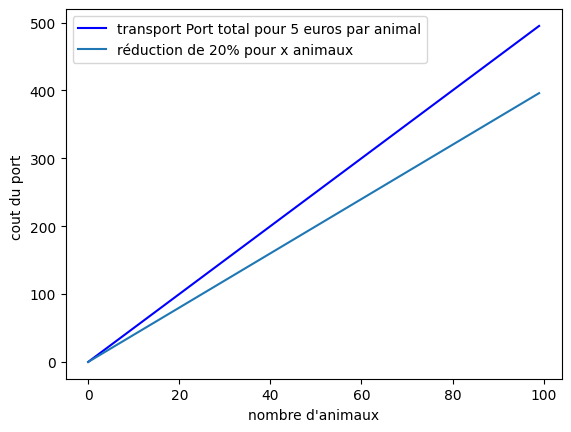

In [10]:
import matplotlib.pyplot as plt


x_cords = range(0,100)

# les frais de transport sont de 5 euros par animal
y_lin = [x * 5 for x in x_cords]

# les frais de transport sont de 5 euros par objet moins une réduction de 20% pour x
y_cords = [ 5 * x -  ( 5 * x * 20 / 100) for x in x_cords] 

plt.plot(x_cords, y_lin, "-b", label="transport Port total pour 5 euros par animal")
plt.plot(x_cords, y_cords, label="réduction de 20% pour x animaux")

plt.xlabel("nombre d'animaux")
plt.ylabel("cout du port ")
plt.legend(loc="upper left")
plt.show()

In [11]:
# Importer la librairie Pulp sous le pseudo p
import pulp as p 

frais_port = 5

# Créer un programme linéaire de maximisation
Mon_Probleme = p.LpProblem('maximisation_de_profit_agricole', p.LpMaximize)  

# Créer les variables du problème, 
# On dit que ce sont des variables entières, car on ne peut pas avoir une demi vache.
charolaise = p.LpVariable("charolaise", 0, None, p.LpInteger)   
blanc_bleu = p.LpVariable("blanc_bleu", 0, None, p.LpInteger)   
salers = p.LpVariable("salers", 0, None, p.LpInteger)  

# Ecrire la fonction objectif à maximizer qui nous donne un résultat en Euros 
Mon_Probleme +=  (100 * charolaise - (frais_port * charolaise - ( frais_port * charolaise * 20 / 100))) 
+ ( 110 * blanc_bleu - ( frais_port * blanc_bleu - ( frais_port * blanc_bleu * 20 / 100)))
+ ( 115 * salers - (frais_port * salers - ( frais_port * salers * 20 / 100))) 

# Les contraintes : 

# nourriture
Mon_Probleme += 7 * charolaise + 7 * blanc_bleu + 8 * salers <= 600

# eau
Mon_Probleme += 4.5* charolaise + 9 * blanc_bleu + 3 * salers <= 700

# Résoudre
Mon_Probleme.solve()
# On imprime les variables qui ont leur valeur optimisées
for v in Mon_Probleme.variables():
    print(v.name, "=", v.varValue)
# La valeur de la fonction objective optimisée est imprimée à l'écran
print("Profit total maximisé = ", p.value(Mon_Probleme.objective))

blanc_bleu = 0.0
charolaise = 85.0
salers = 0.0
Profit total maximisé =  8160.0


## Adding "multiple"

We come back to our basic problem,

We will add a constraint which says that for any animal of the white white type produced, then it is necessary to produce 2 animals of the Salers type.

In [12]:
# Importer la librairie Pulp sous le pseudo p
import pulp as p 

# Créer un programme linéaire de maximisation
Mon_Probleme = p.LpProblem('maximisation_de_profit_agricole', p.LpMaximize)  

# Créer les variables du problème, 
# On dit que ce sont des variables entières, car on ne peut pas avoir une demi vache.
charolaise = p.LpVariable("charolaise", 0, None, p.LpInteger)   
blanc_bleu = p.LpVariable("blanc_bleu", 0, None, p.LpInteger)   
salers = p.LpVariable("salers", 0, None, p.LpInteger)  

# Ecrire la fonction objectif à maximizer qui nous donne un résultat en Euros 
Mon_Probleme +=  100 * charolaise + 110 * blanc_bleu + 115 * salers

# Les contraintes : 

# nourriture
Mon_Probleme += 7 * charolaise + 7 * blanc_bleu + 8 * salers <= 600

# eau
Mon_Probleme += 4.5* charolaise + 9 * blanc_bleu + 3 * salers <= 700

# Contrainte de multiplicité :
# 1 charolaise produite, on doit avoir 2 salers
Mon_Probleme += charolaise  * 2 == salers

# Résoudre
Mon_Probleme.solve()
# On imprime les variables qui ont leur valeur optimisées
for v in Mon_Probleme.variables():
    print(v.name, "=", v.varValue)
# La valeur de la fonction objective optimisée est imprimée à l'écran
print("Profit total maximisé = ", p.value(Mon_Probleme.objective))

blanc_bleu = 72.0
charolaise = 4.0
salers = 8.0
Profit total maximisé =  9240.0


# Addition of additive cost constraints

- If the production of animal type white_bleu> 0, then the maintenance side is 20
- if the production of type> 20 animal, then the maintenance side is an additional 30 euros
- if the production of type> 50 animal, then the maintenance side is an additional 30 euros

In [13]:
import cplex
import docplex.mp
from docplex.mp.model import Model
from docplex.util.environment import get_environment

# On crée notre modèle
model = Model(name='maximisation_de_profit_agricole', log_output=True)

# On crée nos variables de décision
charolaise = model.integer_var(name='charolaise')
blanc_bleu = model.integer_var(name='blanc_bleu')
salers = model.integer_var(name='salers ')
# Les variables binaires
depassement_0 = model.binary_var(name='depassement_0')
depassement_20 = model.binary_var(name='depassement_20')
depassement_50 = model.binary_var(name='depassement_50')

# On crée la fonction objectif
model.maximize(100 * charolaise + 110 * blanc_bleu + 115 * salers 
               - depassement_0 * 20 - depassement_20 * 30 - depassement_50 * 50) 

# On crée les contraintes
model.add_constraint(7 * charolaise + 7 * blanc_bleu + 8 * salers <= 600)
model.add_constraint(4.5* charolaise + 9 * blanc_bleu + 3 * salers <= 700)


# Contraintes de coûts additives
# On crée les contraintes binaires qui vont activer ou pas les couts dans la fonction objectif
model.add_constraint(model.if_then(blanc_bleu >= 0, depassement_0 == 1))
model.add_constraint(model.if_then(blanc_bleu >= 20, depassement_20 == 1))
model.add_constraint(model.if_then(blanc_bleu >= 50, depassement_50 == 1))

model.parameters.mip.display.set(0)
sol_model = model.solve()
model.print_solution()

Version identifier: 22.1.1.0 | 2023-02-09 | 22d6266e5
CPXPARAM_Read_DataCheck                          1
CPXPARAM_MIP_Display                             0
objective: 9200
status: OPTIMAL_SOLUTION(2)
  "blanc_bleu"=72
  "salers "=12
  "depassement_0"=1
  "depassement_20"=1
  "depassement_50"=1


## Addition of discontinuous constraints.

## Description :

- If the production of animal type white_bleu> 0, then the maintenance side is 20
- if the production of animal type white_bleu> 20, then the maintenance side is 30 euros
- if the production of animal type white_bleu> 50, then the maintenance side is 50 euros

- Important note:
The costs are always taken into account when optimizing, when the simplex is executed.
That is to say that the solver takes into account the fixed costs mentioned above and suddenly, may choose less blue animal of blue.

## graphic of our discontinuous constraints.


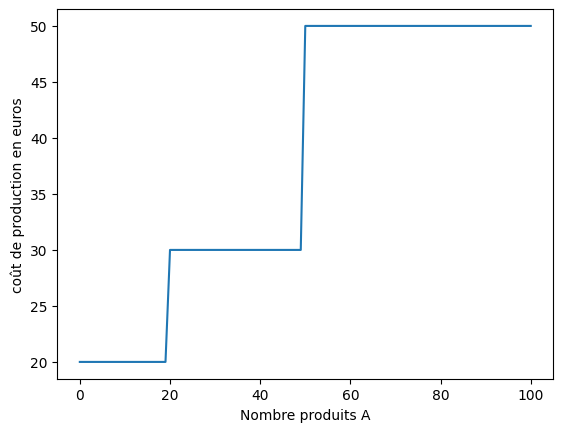

In [14]:
import matplotlib.pyplot as plt
plt.plot([0, 19, 20, 49,50,100], [20,20,30, 30, 50 ,50])
plt.xlabel('Nombre produits A')
plt.ylabel('coût de production en euros')
plt.show()

## Solution avec Python Cplex

In [15]:
import cplex
import docplex.mp
from docplex.mp.model import Model
from docplex.util.environment import get_environment

# On crée notre modèle
model = Model(name='maximisation_de_profit_agricole', log_output=True)

# On crée nos variables de décision
charolaise = model.integer_var(name='charolaise')
blanc_bleu = model.integer_var(name='blanc_bleu')
salers = model.integer_var(name='salers ')

# On définit la fonction piecewize de type discontinue
f = model.piecewise(0, [(0, 20), (20, 30), (50, 50)],1)

# On crée la fonction objectif
# On maximise moins les coûts provenant de la fonction piecewize f(x)
model.maximize(100 * charolaise + 110 * blanc_bleu  + 115 * salers - f(blanc_bleu)) 

# On crée les contraintes
model.add_constraint(7 * charolaise + 7 * blanc_bleu + 8 * salers <= 600)
model.add_constraint(4.5* charolaise + 9 * blanc_bleu + 3 * salers <= 700)

# Résoudre
model.parameters.mip.display.set(0)
sol_model = model.solve()
model.print_solution()

Version identifier: 22.1.1.0 | 2023-02-09 | 22d6266e5
CPXPARAM_Read_DataCheck                          1
CPXPARAM_MIP_Display                             0
objective: 9228.000
status: OPTIMAL_SOLUTION(2)
  "blanc_bleu"=72
  "salers "=12


# Ajout de contraintes piecewize

Les contraintes piecewize permettent de linéariser une fonction côut non linéaire.



# Solution avec Python Cplex

Il existe 2 méthodes, on choisit celle avec les breakpoints. 
(Voir le lien https://ibmdecisionoptimization.github.io/tutorials/html/Beyond_Linear_Programming.html)

Le coût de production est proportionnel au nombre d'animal de type blanc_bleu produit, 
mais il différe par "à coups" selon certains seuils.
On décompose cela en fonctions piecewize, et on se sert de Python Cplex pour résoudre et afficher le graphique des fonctions de coût piecewize.

Version identifier: 22.1.1.0 | 2023-02-09 | 22d6266e5
CPXPARAM_Read_DataCheck                          1
CPXPARAM_MIP_Display                             0
charolaise  =  0
blanc_bleu  =  72.0
salers   =  12.0
_pwl3  =  52.2
solution for: maximisation_de_profit_agricole
objective: 9247.8
status: OPTIMAL_SOLUTION(2)
blanc_bleu=72
salers =12



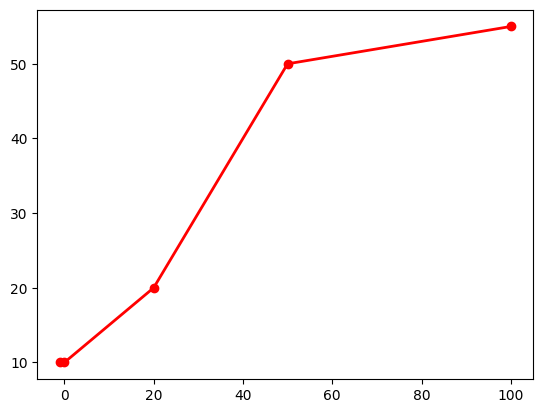

In [16]:
import cplex
import docplex.mp
from docplex.mp.model import Model


# On crée notre modèle
model = Model(name='maximisation_de_profit_agricole', log_output=True)

# On crée nos variables de décision
charolaise = model.integer_var(name='charolaise')
blanc_bleu = model.integer_var(name='blanc_bleu')
salers = model.integer_var(name='salers ')

# On crée les fonctions piecewize avec leur breakpoints
pwf2 = model.piecewise(preslope=0, breaksxy=[(0, 10), (20, 20), (50, 50)], postslope=0.1)


# On crée cette contrainte pour contrôler 
# si les couts piecewize fonctionnent quand on change la valeur
# model.add_constraint(a  <= 1000)

# On crée la fonction objectif
# On maximise notre profit, moins les couts de type piecewize
model.maximize(100 * charolaise + 110 * blanc_bleu  + 115 * salers - pwf2(blanc_bleu)) 

# On crée les contraintes
model.add_constraint(7 * charolaise + 7 * blanc_bleu + 8 * salers <= 600)
model.add_constraint(4.5* charolaise + 9 * blanc_bleu + 3 * salers <= 700)

model.parameters.mip.display.set(0)
model.solve()

for v in model.iter_integer_vars():
    print(v," = ",v.solution_value) 

for v in model.iter_continuous_vars():
    print(v," = ",v.solution_value) 

for v in model.iter_binary_vars():
    print(v," = ",v.solution_value) 

print(model.solution)

# On dessine les fonctions de couts piecewize
pwf2.plot(lx=-1, rx=100, k=1, color='r', marker='o', linewidth=2)

## - Creation of Piecewize functions from a convex function

We look at this bookstore, pwlf:
https://jekel.me/piecewise_line_fit_py/examples.html#fit-with-known-breakpoint-locations

This goes beyond the framework of this notebook, but it is a path to recover the breakpoints, in order to then create a linear optimization.
To see if there is not a simpler solution.


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pwlf

# your data
y = np.array([0.00000000e+00, 9.69801700e-03, 2.94350340e-02,              4.39052750e-02, 5.45343950e-02, 6.74104940e-02,              8.34831790e-02, 1.02580042e-01, 1.22767939e-01,              1.42172312e-01, 0.00000000e+00, 8.58600000e-06,              8.31543400e-03, 2.34184100e-02, 3.39709150e-02,              4.03581990e-02, 4.53545600e-02, 5.02345260e-02,              5.55253360e-02, 6.14750770e-02, 6.82125120e-02,              7.55892510e-02, 8.38356810e-02, 9.26413070e-02,              1.02039790e-01, 1.11688258e-01, 1.21390666e-01,              1.31196948e-01, 0.00000000e+00, 1.56706510e-02,              3.54628780e-02, 4.63739040e-02, 5.61442590e-02,              6.78542550e-02, 8.16388310e-02, 9.77756110e-02,              1.16531753e-01, 1.37038283e-01, 0.00000000e+00,              1.16951050e-02, 3.12089850e-02, 4.41776550e-02,              5.42877590e-02, 6.63321350e-02, 8.07655920e-02,              9.70363280e-02, 1.15706975e-01, 1.36687642e-01,              0.00000000e+00, 1.50144640e-02, 3.44519970e-02,              4.55907760e-02, 5.59556700e-02, 6.88450940e-02,              8.41374060e-02, 1.01254006e-01, 1.20605073e-01,              1.41881288e-01, 1.62618058e-01])
x = np.array([0.00000000e+00, 8.82678000e-03, 3.25615100e-02,              5.66106800e-02, 7.95549800e-02, 1.00936330e-01,              1.20351520e-01, 1.37442010e-01, 1.51858250e-01,              1.64433570e-01, 0.00000000e+00, -2.12600000e-05,              7.03872000e-03, 1.85494500e-02, 3.00926700e-02,              4.17617000e-02, 5.37279600e-02, 6.54941000e-02,              7.68092100e-02, 8.76596300e-02, 9.80525800e-02,              1.07961810e-01, 1.17305210e-01, 1.26063930e-01,              1.34180360e-01, 1.41725010e-01, 1.48629710e-01,              1.55374770e-01, 0.00000000e+00, 1.65610200e-02,              3.91016100e-02, 6.18679400e-02, 8.30997400e-02,              1.02132890e-01, 1.19011260e-01, 1.34620080e-01,              1.49429370e-01, 1.63539960e-01, -0.00000000e+00,              1.01980300e-02, 3.28642800e-02, 5.59461900e-02,              7.81388400e-02, 9.84458400e-02, 1.16270210e-01,              1.31279040e-01, 1.45437090e-01, 1.59627540e-01,              0.00000000e+00, 1.63404300e-02, 4.00086000e-02,              6.34390200e-02, 8.51085900e-02, 1.04787860e-01,              1.22120350e-01, 1.36931660e-01, 1.50958760e-01,              1.65299640e-01, 1.79942720e-01])

# your desired line segment end locations
x0 = np.array([min(x), 0.039, 0.10, max(x)])

# initialize piecewise linear fit with your x and y data
my_pwlf = pwlf.PiecewiseLinFit(x, y)

# fit the data with the specified break points
# (ie the x locations of where the line segments
# will terminate)
my_pwlf.fit_with_breaks(x0)

# predict for the determined points
xHat = np.linspace(min(x), max(x), num=10000)
yHat = my_pwlf.predict(xHat)

# plot the results
plt.figure()
plt.plot(x, y, 'o')
plt.plot(xHat, yHat, '-')
plt.show()

ModuleNotFoundError: No module named 'pwlf'

## 11. Make a profit simulation with normal law

Sometimes the profits are not too high, to make a more realistic optimization, which remains linear, we can use the normal law.(Credit: Aaron Stubberfield)

We take into account the risks: Profit estimates can be inaccurate.


Read this Aaron Stubberfield link:
https://s3.amazonaws.com/assets.datacamp.com/production/course_8835/slides/chaptter4.pdf

We take up our basic linear program and add the tip of the normal law.
The results are therefore different each time we recharge the program, since the probability is recalculated each time.

In [ ]:
# Importer la librairie Pulp sous le pseudo p
import pulp as p 
import random
  
# Probabilités
a, b, c = random.normalvariate(0,25),random.normalvariate(0,25),random.normalvariate(0,25)

# Créer un programme linéaire de maximisation
Mon_Probleme = p.LpProblem('maximisation_de_profit_agricole', p.LpMaximize)  

# Créer les variables du problème, 
# On dit que ce sont des variables entières, car on ne peut pas avoir une demi vache.
charolaise = p.LpVariable("charolaise", 0, None, p.LpInteger)   
blanc_bleu = p.LpVariable("blanc_bleu", 0, None, p.LpInteger)   
salers = p.LpVariable("salers", 0, None, p.LpInteger)  

# Ecrire la fonction objectif à maximizer qui nous donne un résultat en Euros 
Mon_Probleme +=  (100+a) * charolaise + (110+b) * blanc_bleu + (115+c) * salers

# Les contraintes : 

# nourriture
Mon_Probleme += 7 * charolaise + 7 * blanc_bleu + 8 * salers <= 600

# eau
Mon_Probleme += 4.5* charolaise + 9 * blanc_bleu + 3 * salers <= 700

# Résoudre
Mon_Probleme.solve()
# On imprime les variables qui ont leur valeur optimisées
for v in Mon_Probleme.variables():
    print(v.name, "=", v.varValue)
# La valeur de la fonction objective optimisée est imprimée à l'écran
print("Profit total maximisé = ", p.value(Mon_Probleme.objective))

print("Profits probabilistes:",a,b,c)

blanc_bleu = 74.0
charolaise = 0.0
salers = 10.0
Profit total maximisé =  11520.916575486885
Profits probabilistes: -5.237092247288431 31.676034420169614 -11.310997160566966


## - 12. Unsolds items taken into account


# Comin soon

In [ ]:
# Comin soon

# 14. MinMax optimizations

- Description (credit: apmonitor.com - http://apmonitor.com/me575/index.php/main/minimax)

A minimum problem seeks to minimize the maximum value of a certain number of decision variables.
It is sometimes applied to minimize the possible loss in the worst case (maximum loss).
A maximimal problem maximizes the minimum value.
It is used to maximize the minimum objective (such as profit or income) for all potential scenarios.

Suppose we wanted to minimize the maximum of 3 variables and that the sum of these variables must total 15. This problem arises as follows:

- Min Max (X1, X2, X3)
- S.T. x1 + x2 + x3 = 15



-------------------------------------------------------------------------------------------------------

# Maximization of profit <b> non -linear </b>

# The basic problem.

## Mix products of 3 objects.

Description :
I sell 3 objects, I decide to apply a reduction in the event of wholesale on the part of a
important customer.
The reduction is "smooth", that is to say that it does not jump from one value to another as with the Piecewize constraints.
In other words, the larger the number of objects, the less the price of an object is expensive.


History :

I have 1 machine that produces 3 rooms.The machine can make a maximum of 1000 products in the allotted time.
The sale price of parts A, B and C decreases with the quantity produced.
- The sale price of part A is 81-qa/20 (the price decreases if you produce a lot)
- The sale price of part B is 90-qb/10 (the price decreases if you produce a lot)
- The sale price of the part C is 85-qc/10 (the price decreases if you produce a lot)

What parts sell to maximize profit while taking into account my non -linear price reduction?

* Similar link:
https://www.emse.fr/~beaune/solver/xpnl.html

# The costs represented graphically

This graph allows me to "tuner" and watch my future fat -price reductions.

We see 3 beautiful concave functions.

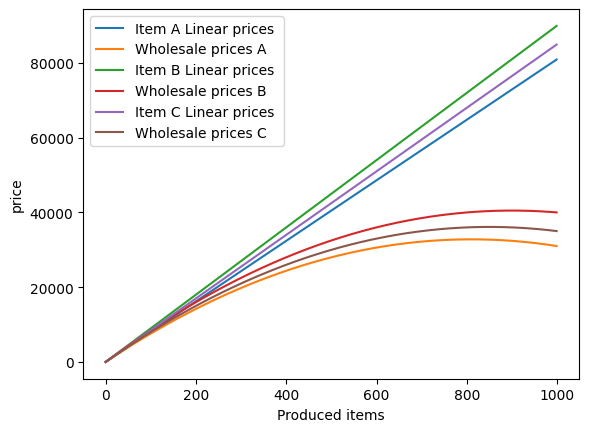

In [ ]:
import matplotlib.pyplot as plt
import math

# On définit l'étendue (range)
x_cords = range(0,1000)

# On définit les fonctions.
prix_lineaires_objet_A = [x * 81 for x in x_cords] 
prix_non_lineaires_objet_A = [x * ( 81 - x / 20) for x in x_cords] 

prix_lineaires_objet_B = [x * 90 for x in x_cords] 
prix_non_lineaires_objet_B = [x * ( 90 - x / 20) for x in x_cords] 

prix_lineaires_objet_C = [x * 85 for x in x_cords] 
prix_non_lineaires_objet_C = [x * ( 85 - x / 20) for x in x_cords] 

# On trace
plt.plot(x_cords,prix_lineaires_objet_A, label="Item A Linear prices ")
plt.plot(x_cords,prix_non_lineaires_objet_A, label="Wholesale prices A")

plt.plot(x_cords,prix_lineaires_objet_B, label="Item B Linear prices ")
plt.plot(x_cords,prix_non_lineaires_objet_B, label="Wholesale prices B")

plt.plot(x_cords,prix_lineaires_objet_C, label="Item C Linear prices ")
plt.plot(x_cords,prix_non_lineaires_objet_C, label="Wholesale prices C")

plt.xlabel("Produced items")
plt.ylabel("price")
plt.legend(loc="upper left")
plt.show()

# Mathematical modeling

Coming !

# Resolve optimization with the Gekko solver.

We use Gekko, the non -linear solver.

In [ ]:
# On importe Gekko
from gekko import GEKKO

m = GEKKO(remote=False) # Initialize gekko

#The example problem that you referenced uses the default IPOPT solver. To get a binary or integer solution, switch to the APOPT solver.
m.options.SOLVER = 1

In [ ]:
# On crée les variables de décision , ce sera notre nombre de pièces à réaliser, vu qu'on ne 
# peut pas avoir 1/2 objet, on dit que ce sont des variables entières.

A = m.Var(value=1,lb=0,ub=10000,integer=True)
B = m.Var(value=1,lb=0,ub=10000,integer=True)
C = m.Var(value=1,lb=0,ub=10000,integer=True)

# contraintes
m.Equation( A + B + C <= 1000) # La machine un peut produire 1000 objets maximum


# Voici notre fonction objectif , qui tient compte du fait que plus on produits de pièces, Moins ça coute cher !!
# On voit qu'elle est non linéaire parce que A , B et C sont élevés au carré !!
m.Maximize( A * (81 - ( A / 20  )) + B * (90 - (B / 20)) + C * (85 - (C / 20)))



In [ ]:
# On imprime le résultat 
m.options.IMODE = 3 # Steady state optimization

m.solve(disp=False) # Solve

print('Solution')

print('A: ' + str(A.value))
print('B: ' + str(B.value))
print('C: ' + str(C.value))

print('Objectif: ' + str(-m.options.objfcnval))

Solution
A: [290.0]
B: [380.0]
C: [330.0]
Objectif: 68870.0


# Does the Cplex solver find the same solutions?

Yes !He finds the same solution!


In [ ]:
import cplex
import docplex.mp
from docplex.mp.model import Model
from docplex.util.environment import get_environment

# On crée notre modèle
model = Model(name='maximisation_de_profit_non_lineaire', log_output=True)

# On crée nos variables de décision
A = model.integer_var(name='A')
B = model.integer_var(name='B')
C = model.integer_var(name='C')

# On crée la fonction objectif
model.maximize(A * (81 - ( A / 20  )) + B * (90 - (B / 20)) + C * (85 - (C / 20))) 

# On crée les contraintes
model.add_constraint(A + B + C <= 1000)

# Résoudre
model.parameters.mip.display.set(0)
sol_model = model.solve()
model.print_solution()

Version identifier: 22.1.0.0 | 2022-03-25 | 54982fbec
CPXPARAM_Read_DataCheck                          1
CPXPARAM_MIP_Display                             0
objective: 68870.000
status: OPTIMAL_SOLUTION(2)
  A=290
  B=380
  C=330
